In [ ]:
#import pandas as pd

# Load the Excel file
#data = pd.read_excel('Data .xlsx')

# Step 1: Handle Missing Values
# Drop columns with more than 90% missing values
#threshold = 0.9 * len(data)
#data_reduced = data.dropna(thresh=threshold, axis=1)

# Step 2: Impute or drop rows with remaining missing values
# For simplicity, we'll drop rows with missing values in this step
#data_cleaned = data_reduced.dropna()

# Step 3: Convert data types
# Convert date columns to datetime
#date_columns = ['Registration date', 'Diagnosis date', 'Start treatment date']
#for col in date_columns:
    #data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')

# Convert categorical columns to category
#categorical_columns = ['Gender', 'Previously Treated', 'Registration group', 'Treatment unit',
                       #'Treatment unit division', 'Treatment unit district', 'Case definition',
                       #'Site of Disease', 'Initial regimen', 'Current regimen']
#for col in categorical_columns:
    #data_cleaned[col] = data_cleaned[col].astype('category')

# Step 4: Normalize column names
#data_cleaned.columns = [col.strip().lower().replace(' ', '_') for col in data_cleaned.columns]

# Step 5: Feature Engineering
# Example: Calculate duration between registration and treatment start dates
#data_cleaned['registration_to_treatment_days'] = (data_cleaned['start_treatment_date'] - data_cleaned['registration_date']).dt.days

# Step 6: Remove duplicates
#data_cleaned = data_cleaned.drop_duplicates()

# Display the cleaned data
#print(data_cleaned.head())

# Save the cleaned data to a new CSV file
#data_cleaned.to_csv('cleaned_data.csv', index=False)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import ttest_ind, shapiro
from statsmodels.stats.weightstats import ztest
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd




In [ ]:
# Load and preprocess the data
data = pd.read_excel('Data .xlsx')

# Handle missing values, convert data types, normalize column names
# Example preprocessing steps (adjust as needed)
threshold = 0.9 * len(data)
data_reduced = data.dropna(thresh=threshold, axis=1)
data_cleaned = data_reduced.dropna()
date_columns = ['Registration date', 'Diagnosis date', 'Start treatment date']
for col in date_columns:
    data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')
# Calculate 'registration_to_treatment_days' if both columns are available
if 'Registration date' in data_cleaned.columns and 'Start treatment date' in data_cleaned.columns:
    data_cleaned['registration_to_treatment_days'] = (data_cleaned['Start treatment date'] - data_cleaned['Registration date']).dt.days
categorical_columns = ['Gender', 'Previously Treated', 'Registration group', 'Treatment unit',
                       'Treatment unit division', 'Treatment unit district', 'Case definition',
                       'Site of Disease', 'Initial regimen', 'Current regimen']
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].astype('category')
data_cleaned.columns = [col.strip().lower().replace(' ', '_') for col in data_cleaned.columns]

# Create a target variable (example: 'current_regimen')
target_variable = 'initial_regimen'
X = data_cleaned.drop(columns=[target_variable])
y = data_cleaned[target_variable]

# Convert target variable to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocess the data: numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensure dense output
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Ensure that the transformed data is dense
X_train = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate precision, recall, f1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes))
print(f'Test Accuracy: {test_accuracy:.2f}')


C:\Users\user\AppData\Local\Temp\ipykernel_11612\492051154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_11612\492051154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_11612\492051154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a



Epoch 1/50


14/14 [==============================] - 1s 17ms/step - loss: 0.8843 - accuracy: 0.1285 - val_loss: 0.6575 - val_accuracy: 0.9074
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.7593 - val_loss: 0.5226 - val_accuracy: 1.0000
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.9907 - val_loss: 0.3544 - val_accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.9953 - val_loss: 0.1576 - val_accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 0.9953 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0843 - accuracy: 0.9953 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9953 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 8/50
14/1

5/5 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9851
Train Accuracy: 1.00
Test Accuracy: 0.99
5/5 [==============================] - 0s 2ms/step
Precision: 0.97
Recall: 0.99
F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       132
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.99       134
   macro avg       0.33      0.33      0.33       134
weighted avg       0.97      0.99      0.98       134

Test Accuracy: 0.99


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

In [ ]:
# Create a target variable (example: 'current_regimen')
target_variable = 'case_definition'
X = data_cleaned.drop(columns=[target_variable])
y = data_cleaned[target_variable]

# Convert target variable to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocess the data: numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensure dense output
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Ensure that the transformed data is dense
X_train = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/50
14/14 [==============================] - 1s 15ms/step - loss: 0.6781 - accuracy: 0.5584 - val_loss: 0.6735 - val_accuracy: 0.5833
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.6192 - val_loss: 0.6572 - val_accuracy: 0.5926
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6378 - accuracy: 0.6425 - val_loss: 0.6414 - val_accuracy: 0.5926
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.6449 - val_loss: 0.6202 - val_accuracy: 0.6944
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.6706 - val_loss: 0.6036 - val_accuracy: 0.7963
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5963 - accuracy: 0.7009 - val_loss: 0.5748 - val_accuracy: 0.8056
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5936 - accuracy: 0.7243 - val_loss: 0.5532 - val_accuracy: 0.8148
Epoch 8/50
14/14 [=

In [ ]:
# Create a target variable (example: 'current_regimen')
target_variable = 'current_regimen'
X = data_cleaned.drop(columns=[target_variable])
y = data_cleaned[target_variable]

# Convert target variable to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocess the data: numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensure dense output
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Ensure that the transformed data is dense
X_train = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate precision, recall, f1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes))


Epoch 1/50
14/14 [==============================] - 1s 15ms/step - loss: 1.0778 - accuracy: 0.3738 - val_loss: 0.9317 - val_accuracy: 0.9907
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.8196 - accuracy: 0.9276 - val_loss: 0.6502 - val_accuracy: 1.0000
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.9907 - val_loss: 0.2818 - val_accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.9930 - val_loss: 0.0614 - val_accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.9953 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9953 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9953 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 8/50
14/14 [=

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

In [ ]:
# Create a target variable (example: 'current_regimen')
target_variable = 'case_definition'
X = data_cleaned.drop(columns=[target_variable])
y = data_cleaned[target_variable]

# Convert target variable to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocess the data: numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensure dense output
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Ensure that the transformed data is dense
X_train = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate precision, recall, f1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes))


Epoch 1/50
14/14 [==============================] - 1s 15ms/step - loss: 0.6859 - accuracy: 0.5514 - val_loss: 0.6670 - val_accuracy: 0.6481
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6796 - accuracy: 0.5935 - val_loss: 0.6499 - val_accuracy: 0.5833
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6145 - val_loss: 0.6336 - val_accuracy: 0.5833
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.6308 - val_loss: 0.6178 - val_accuracy: 0.6019
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6183 - accuracy: 0.6589 - val_loss: 0.5905 - val_accuracy: 0.7407
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5942 - accuracy: 0.6869 - val_loss: 0.5562 - val_accuracy: 0.7870
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.7173 - val_loss: 0.5217 - val_accuracy: 0.8056
Epoch 8/50
14/14 [=

In [ ]:
# Example feature columns to compare
numerical_feature = 'age_(in_year)'  # Replace with a numerical column from your data
categorical_feature = 'previously_treated'  # Replace with a categorical column from your data

# Encode categorical feature if not already encoded
label_encoder = LabelEncoder()
data_cleaned[categorical_feature] = label_encoder.fit_transform(data_cleaned[categorical_feature])

# Separate the data into two groups based on the categorical feature
group1 = data_cleaned[data_cleaned[categorical_feature] == 0][numerical_feature]
group2 = data_cleaned[data_cleaned[categorical_feature] == 1][numerical_feature]

# Perform t-test and calculate p-value
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Perform normality test (Shapiro-Wilk test)
shapiro_group1 = stats.shapiro(group1)
shapiro_group2 = stats.shapiro(group2)

print('\nShapiro-Wilk Test for Normality')
print(f'Group 1: Statistics={shapiro_group1[0]}, p={shapiro_group1[1]}')
print(f'Group 2: Statistics={shapiro_group2[0]}, p={shapiro_group2[1]}')

# If p > 0.05, data is considered normally distributed
if shapiro_group1[1] > 0.05:
    print('Group 1 follows a normal distribution')
else:
    print('Group 1 does not follow a normal distribution')

if shapiro_group2[1] > 0.05:
    print('Group 2 follows a normal distribution')
else:
    print('Group 2 does not follow a normal distribution')

# Perform additional normality tests if needed (e.g., Kolmogorov-Smirnov test, Anderson-Darling test)


T-Statistic: -0.2770989764879808
P-Value: 0.7817898326852699

Shapiro-Wilk Test for Normality
Group 1: Statistics=0.9768362045288086, p=9.459263594635559e-09
Group 2: Statistics=0.8453873991966248, p=0.14438042044639587
Group 1 does not follow a normal distribution
Group 2 follows a normal distribution


C:\Users\user\AppData\Local\Temp\ipykernel_11612\866017794.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_feature] = label_encoder.fit_transform(data_cleaned[categorical_feature])


In [ ]:
# Calculate 'registration_to_treatment_days' if both columns are available

# Example feature columns to compare
numerical_feature = 'registration_to_treatment_days'  # Replace with a numerical column from your data
categorical_feature = 'gender'  # Replace with a categorical column from your data

# Encode categorical feature if not already encoded
label_encoder = LabelEncoder()
data_cleaned[categorical_feature] = label_encoder.fit_transform(data_cleaned[categorical_feature])

# Separate the data into two groups based on the categorical feature
group1 = data_cleaned[data_cleaned[categorical_feature] == 0][numerical_feature]
group2 = data_cleaned[data_cleaned[categorical_feature] == 1][numerical_feature]

# Perform t-test and calculate p-value
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Perform normality test (Shapiro-Wilk test)
shapiro_group1 = stats.shapiro(group1)
shapiro_group2 = stats.shapiro(group2)

print('\nShapiro-Wilk Test for Normality')
print(f'Group 1: Statistics={shapiro_group1[0]}, p={shapiro_group1[1]}')
print(f'Group 2: Statistics={shapiro_group2[0]}, p={shapiro_group2[1]}')

# If p > 0.05, data is considered normally distributed
if shapiro_group1[1] > 0.05:
    print('Group 1 follows a normal distribution')
else:
    print('Group 1 does not follow a normal distribution')

if shapiro_group2[1] > 0.05:
    print('Group 2 follows a normal distribution')
else:
    print('Group 2 does not follow a normal distribution')

# Perform additional normality tests if needed (e.g., Kolmogorov-Smirnov test, Anderson-Darling test)


T-Statistic: -0.7486834448300455
P-Value: 0.45431155198425055

Shapiro-Wilk Test for Normality
Group 1: Statistics=0.14522767066955566, p=1.5707383698688242e-34
Group 2: Statistics=0.19219648838043213, p=4.784379582393061e-37
Group 1 does not follow a normal distribution
Group 2 does not follow a normal distribution


C:\Users\user\AppData\Local\Temp\ipykernel_11612\1412506096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_feature] = label_encoder.fit_transform(data_cleaned[categorical_feature])


In [ ]:



# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'gender'

# Separate the groups based on a categorical feature
group1 = data_cleaned[data_cleaned[categorical_feature] == 'Male'][numerical_feature].dropna()
group2 = data_cleaned[data_cleaned[categorical_feature] == 'Female'][numerical_feature].dropna()

# Perform T-Test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Perform Normality Test on the numerical feature
stat, p = shapiro(data_cleaned[numerical_feature].dropna())

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p}")

# Interpret the result of normality test
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# If 'registration_to_treatment_days' was calculated, perform its normality test
if 'registration_to_treatment_days' in data_cleaned.columns:
    stat, p = shapiro(data_cleaned['registration_to_treatment_days'].dropna())
    print(f"Shapiro-Wilk Test for Registration to Treatment Days: {stat}")
    print(f"P-Value: {p}")
    if p > alpha:
        print('Registration to Treatment Days sample looks Gaussian (fail to reject H0)')
    else:
        print('Registration to Treatment Days sample does not look Gaussian (reject H0)')


T-Statistic: nan
P-Value: nan
Shapiro-Wilk Test Statistic: 0.9773622155189514
P-Value: 1.1503578534188819e-08
Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test for Registration to Treatment Days: 0.16472989320755005
P-Value: 0.0
Registration to Treatment Days sample does not look Gaussian (reject H0)


ANOVA Statistic: 28.762158622983108
ANOVA P-Value: 1.1289741099487159e-07
There is a significant difference between the groups (reject H0)
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     0      1   7.6382   0.0 4.8417 10.4347   True
--------------------------------------------------


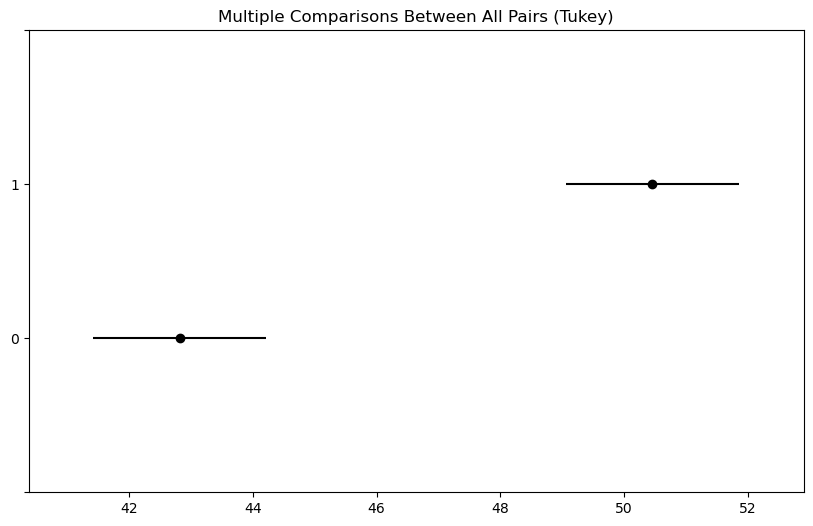

In [ ]:
# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'gender'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 18.08426116438642
ANOVA P-Value: 2.4148389398700096e-05
There is a significant difference between the groups (reject H0)
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
             group1                        group2          meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------------------------------
Bacteriologically confirmed case Clinically diagnosed case  -6.1952   0.0 -9.0557 -3.3347   True
------------------------------------------------------------------------------------------------


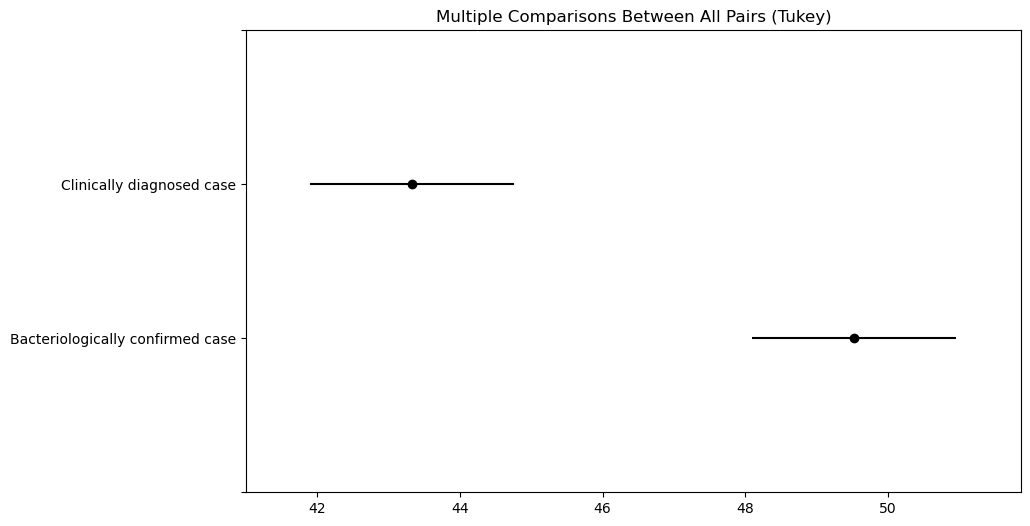

In [ ]:
# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'case_definition'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 1.3625248686208873
ANOVA P-Value: 0.2567251794262245
There is no significant difference between the groups (fail to reject H0)
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1       group2     meandiff p-adj   lower    upper  reject
------------------------------------------------------------------
 Category I    Category II  -2.1426 0.9928 -46.0681 41.7828  False
 Category I Individualized -17.8093 0.2267 -43.2077  7.5891  False
Category II Individualized -15.6667 0.7481 -66.3494 35.0161  False
------------------------------------------------------------------


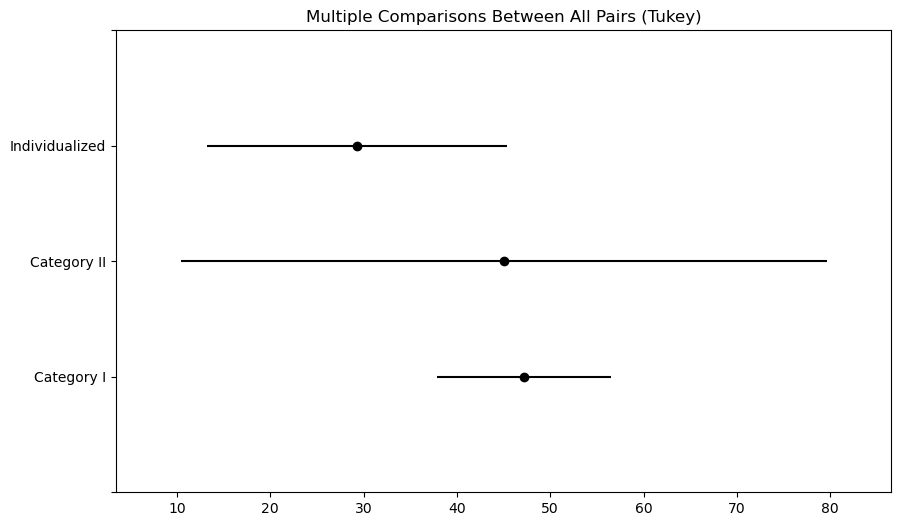

In [ ]:
# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'initial_regimen'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 0.07678384277068648
ANOVA P-Value: 0.7817898326851661
There is no significant difference between the groups (fail to reject H0)
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1       group2       meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
   New Previously treated    2.126 0.7818 -12.9388 17.1909  False
-----------------------------------------------------------------


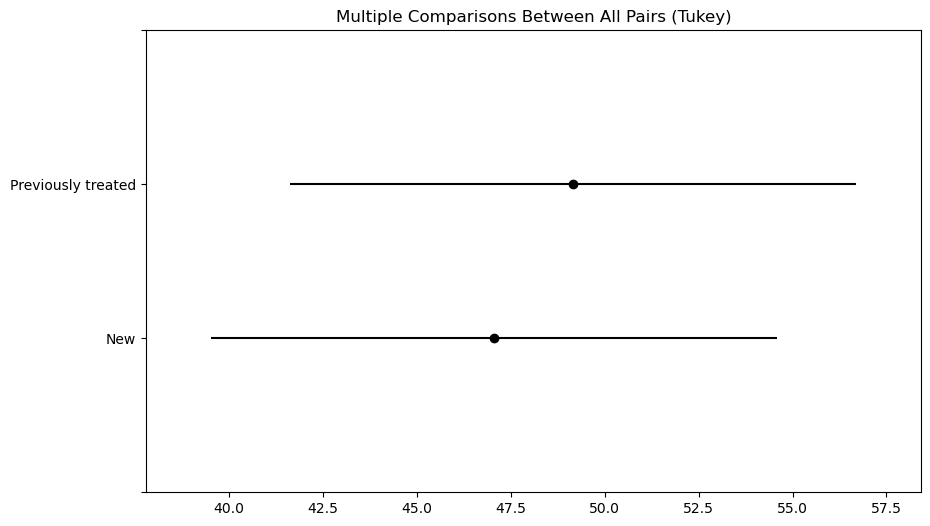

In [ ]:
# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'registration_group'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 3.060971614753748
ANOVA P-Value: 0.0035311283425584847
There is a significant difference between the groups (reject H0)
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
   Barishal  Chattogram  -4.2459 0.8952 -14.1038   5.612  False
   Barishal       Dhaka  -7.1918 0.3024 -16.7544  2.3707  False
   Barishal      Khulna  -0.1018    1.0 -10.5287 10.3251  False
   Barishal Mymensingh   -3.6657 0.9901 -16.7969  9.4655  False
   Barishal    Rajshahi    1.941 0.9993   -8.649  12.531  False
   Barishal     Rangpur  -0.4773    1.0 -11.4675  10.513  False
   Barishal      Sylhet   0.2537    1.0 -11.7408 12.2483  False
 Chattogram       Dhaka  -2.9459 0.8615  -9.3865  3.4947  False
 Chattogram      Khulna   4.1441 0.7233  -3.5213 11.8095  False
 Chattogram Mymensingh    0.5802    1.0 -10.4863 11.6467  False
 Chattogram    Rajshahi   6.186

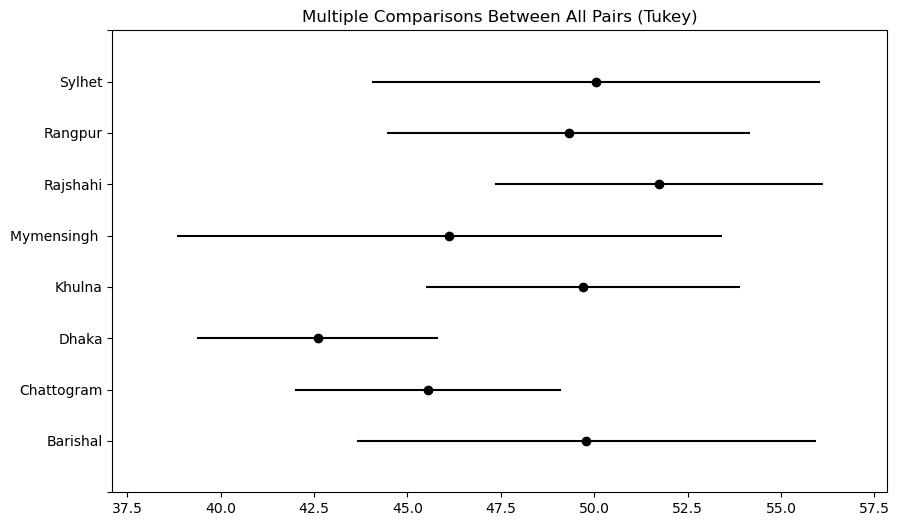

In [ ]:
# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'treatment_unit_division'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 54.80318006992455
ANOVA P-Value: 4.023142175827562e-13
There is a significant difference between the groups (reject H0)
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1       group2  meandiff p-adj lower   upper  reject
-------------------------------------------------------------
Extrapulmonary Pulmonary  12.4002   0.0 9.1112 15.6892   True
-------------------------------------------------------------


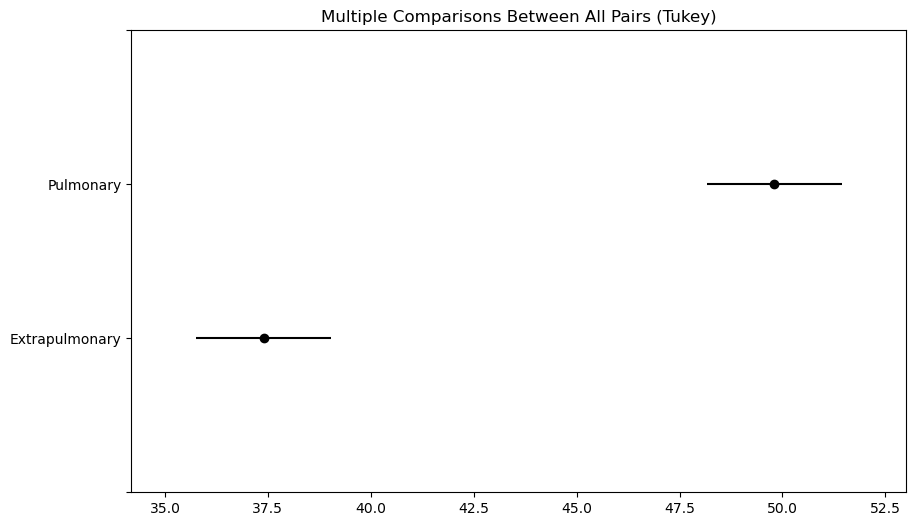

In [ ]:
# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'site_of_disease'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 0.07678384277068648
ANOVA P-Value: 0.7817898326851661
There is no significant difference between the groups (fail to reject H0)
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1    2.126 0.7818 -12.9388 17.1909  False
-----------------------------------------------------


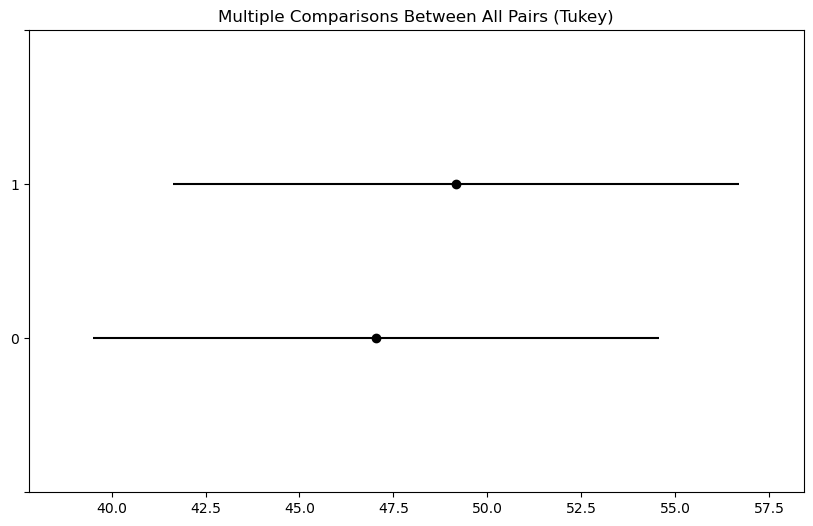

In [ ]:
# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'previously_treated'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 18.08426116438642
ANOVA P-Value: 2.4148389398700096e-05
There is a significant difference between the groups (reject H0)
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
             group1                        group2          meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------------------------------
Bacteriologically confirmed case Clinically diagnosed case  -6.1952   0.0 -9.0557 -3.3347   True
------------------------------------------------------------------------------------------------


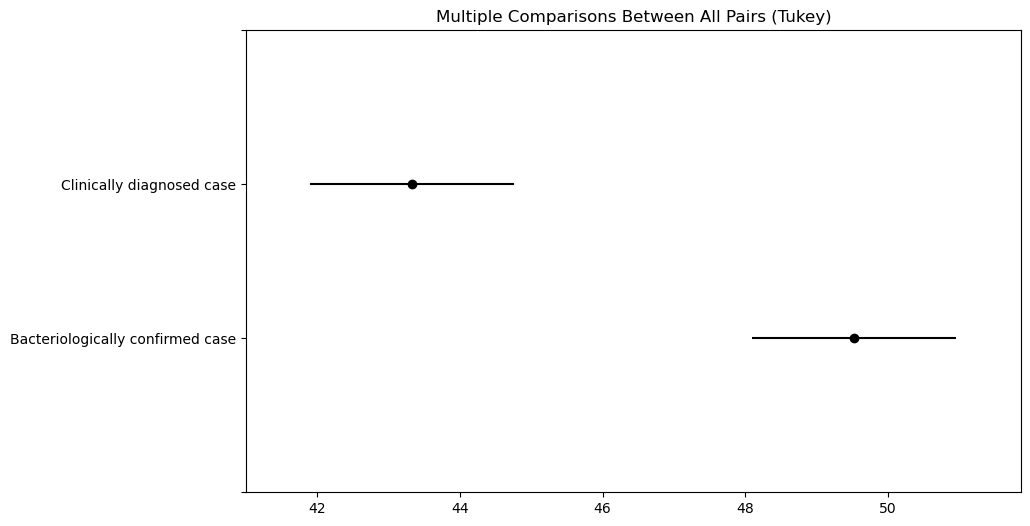

In [ ]:

# Example feature columns
numerical_feature = 'age_(in_year)'
categorical_feature = 'case_definition'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()


ANOVA Statistic: 0.028883439610570202
ANOVA P-Value: 0.9715309148227349
There is no significant difference between the groups (fail to reject H0)
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
    group1                   group2               meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------
    Category I                     Individualized   0.5345 0.9764  -5.4932  6.5623  False
    Category I Retreatment for P-ve (without Lfx)   0.5345  0.992  -9.8902 10.9593  False
Individualized Retreatment for P-ve (without Lfx)      0.0    1.0 -12.0285 12.0285  False
-----------------------------------------------------------------------------------------


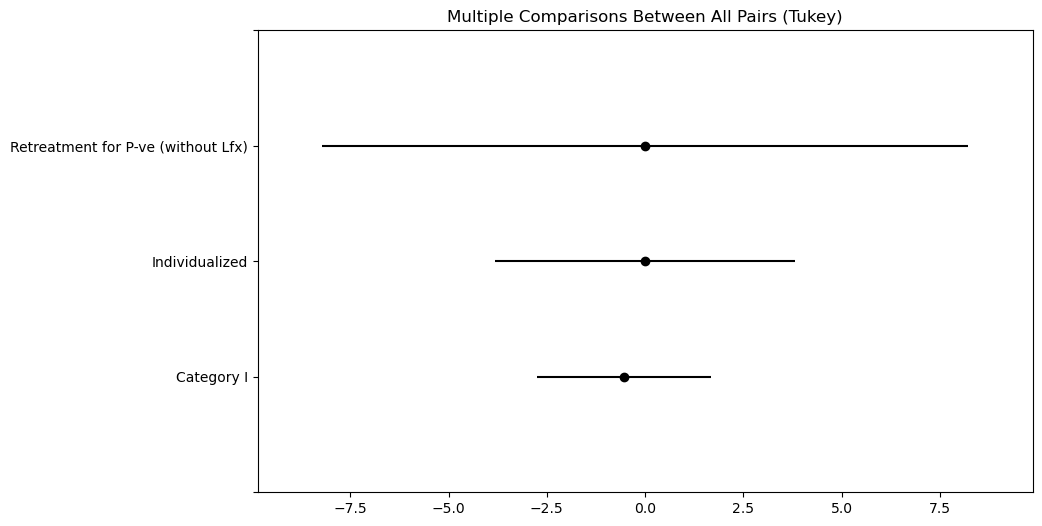

In [ ]:
# Example feature columns
numerical_feature = 'registration_to_treatment_days'
categorical_feature = 'current_regimen'  # Change this to another categorical feature if needed

# Perform ANOVA test
categories = data_cleaned[categorical_feature].unique()
category_data = [data_cleaned[data_cleaned[categorical_feature] == category][numerical_feature].dropna() for category in categories]

anova_stat, anova_p = f_oneway(*category_data)
print(f"ANOVA Statistic: {anova_stat}")
print(f"ANOVA P-Value: {anova_p}")

# Interpret the result of ANOVA
alpha = 0.05
if anova_p < alpha:
    print('There is a significant difference between the groups (reject H0)')
else:
    print('There is no significant difference between the groups (fail to reject H0)')

# Perform post hoc analysis using Tukey's HSD
data_cleaned = data_cleaned.dropna(subset=[numerical_feature, categorical_feature])
tukey = pairwise_tukeyhsd(endog=data_cleaned[numerical_feature], groups=data_cleaned[categorical_feature], alpha=alpha)

print(tukey)

# Optionally, plot the results of the post hoc test
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.show()
